<a href="https://colab.research.google.com/github/voke-brume/AI-ML/blob/main/ML/ForecastingTechLayoffs2022/RNNvsGRUvsLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA ANALYSIS AND FORECASTING OF TECH LAYOFF SINCE COVID_19 PANDEMIC** 
by Voke Brume

CS573 - Prof Omid Dezhangi

In [ ]:
# Install category encoder
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 815 kB/s 


In [ ]:
# Import required libraries
import os

import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import plotly.express as px

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from category_encoders import BinaryEncoder
from sklearn.preprocessing import StandardScaler

# Larger pictures
plt.rcParams["figure.figsize"] = (20,10)

## **INTRODUCTION**

Over the course of the year 2022, tech companies like Meta, Uber, Netflix, and Twitter have made the news for laying off workers. In general, Start-ups and Tech firms around the globe are already feeling the effects of looming economic recession. Slow consumer spending, higher interest rates by central banks and strong dollars overseas is playing a huge role in massive drop of stock prices and big tech firms have seen their stock values drop 30% - 50% from 2021 through 2022. As of late November, more than eighty-five thousand (85,000) workers in the U.S tech sector have been laid off in mass job cuts (Crunchbase News Tally). Globally, a total of 889 tech companies have laid off 142540 employees in 2022 ([layoffs.fyi](https://layoffs.fyi/)).

This report aims to extensively analyze the recent layoffs in the tech sector to discover useful insights, examine the trends in the data, and create a time series model to forecast future trends.


### **FUNCTIONS FOR ANALYSIS**

In [ ]:
def RNN_Example():
    # Let's build the RNN
    model = keras.Sequential()

    # Add a RNN layer with 30 units.
    model.add(layers.SimpleRNN(30,
                               activation = 'tanh',
                               use_bias=True,
                               input_shape=(X.shape[1], X.shape[2])))
    # Add a dropout layer (penalizing more complex models) -- prevents overfitting
    model.add(layers.Dropout(rate=0.2))

    # Add a Dense layer with 1 units (Since we are doing a regression task.
    model.add(layers.Dense(1))

    # Evaluating loss function of MSE using the adam optimizer.
    model.compile(loss='mean_squared_error', optimizer = 'adam')

    # Print out architecture.
    model.summary()
    return model

def GRU_Example():
    # Let's build the GRU
    model = keras.Sequential()

    # Add a GRU layer with 30 units.
    model.add(layers.GRU(30,
                         activation = "tanh",
                         recurrent_activation = "sigmoid",
                         input_shape=(X.shape[1], X.shape[2])))
    # Add a dropout layer (penalizing more complex models) -- prevents overfitting
    model.add(layers.Dropout(rate=0.2))


    # Add a Dense layer with 1 units (Since we are doing a regression task.
    model.add(layers.Dense(1))

    # Evaluating loss function of MSE using the adam optimizer.
    model.compile(loss='mean_squared_error', optimizer = 'adam')

    # Print out architecture.
    model.summary()
    return model

def LSTM_Example():
    # Let's build the LSTM
    model = keras.Sequential()

    # Add a LSTM layer with 10 units.
    model.add(layers.LSTM(30,
                         activation = "tanh",
                         recurrent_activation = "sigmoid",
                         input_shape=(X.shape[1], X.shape[2])))
    # Add a dropout layer (penalizing more complex models) -- prevents overfitting
    model.add(layers.Dropout(rate=0.2))


    # Add a Dense layer with 1 units (Since we are doing a regression task.
    model.add(layers.Dense(1))

    # Evaluating loss function of MSE using the adam optimizer.
    model.compile(loss='mean_squared_error', optimizer = 'adam')

    # Print out architecture.
    model.summary()
    return model

## **DATA**

The data for this project was compiled by [Roger Lee](https://www.rogerlee.com/) on his website [layoffs.fyi](https://layoffs.fyi/). The website uses [Airtable](https://www.airtable.com/) to display tech layoffs since the start of COVID-19 pandemic in 2020. The data is compiled from public reports as seen in Bloomberh, San Francisco Business Times, TechCrunch, and The New York Times, and is updated every week. For this project, the data set contains layoffs from March 11, 2020 to November 30, 2022.

In [ ]:
# Mount your MIX Google Drive
from google.colab import drive
drive_mount = "/content/drive"
drive.mount(drive_mount)

# TODO: Set your path to the assignment's image folder
dir_path = "/Othercomputers/myPCWindows/schoolStuff [D]/CS573/project/data/layoffs2022"
global source
source = drive_mount+dir_path
print(os.listdir(source))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['layoffs.csv', 'layoffs.gsheet']


In [ ]:
# Load file
file = source + '/layoffs.csv'
layoffs = pd.read_csv(file)

This section shows preprocessing and visualization of the data to determine the best approaches for preprocessing. Due to the public sourcing of the data, it is safe to assume that considerable preprocessing would be needed to prepare the data data for analysis. 

### **DATA EXPLORATION/PREPROCESSING**

In [ ]:
# Examine file
layoffs

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Lyst,London,Retail,50.0,0.25,2022-11-29,Unknown,United Kingdom,144.0
1,Bitfront,SF Bay Area,Crypto,NaN,1.00,2022-11-29,Unknown,United States,NaN
2,Lazerpay,Lagos,Crypto,NaN,NaN,2022-11-29,Unknown,Nigeria,NaN
3,MessageBird,Amsterdam,Other,NaN,0.31,2022-11-29,Series C,Netherlands,1100.0
4,Plerk,Guadalajara,Finance,NaN,0.40,2022-11-29,NaN,Mexico,NaN
...,...,...,...,...,...,...,...,...,...
1690,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
1691,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1692,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
1693,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0


The above table shows the data comprises of One thousand, five hundred and seventy-four (1574) rows of data and nine (9) features. These features are:

Company: Name of the company

Location: Location of the layoff

Industry: Industry of the company

Total_laid_off: Number of employees laid off

Percentage: Percentage of employees laid offtotal employees

Date: Date of layoff

Stage: Stage of funding

Country: Country where company in located

Funds_raised: Funds raised by the country scaled to million($)

In [ ]:
layoffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1695 non-null   object 
 1   location             1695 non-null   object 
 2   industry             1692 non-null   object 
 3   total_laid_off       1197 non-null   float64
 4   percentage_laid_off  1136 non-null   float64
 5   date                 1695 non-null   object 
 6   stage                1690 non-null   object 
 7   country              1695 non-null   object 
 8   funds_raised         1573 non-null   float64
dtypes: float64(3), object(6)
memory usage: 119.3+ KB


The above table shows three numeric features (floats) and six object features which varying non-null counts. This means the dataset contains contains null values. To handle this, all rows of null values are dropped from the data set. Also, total_laid_off feature represents humans, so it will be converted to integer.

In [ ]:
# Drop features with null values
layoffs_dropna = layoffs.dropna(inplace=False)
layoffs_dropna.reset_index(inplace=False)
layoffs_dropna

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Lyst,London,Retail,50.0,0.25,2022-11-29,Unknown,United Kingdom,144.0
5,Infarm,Berlin,Other,500.0,0.50,2022-11-28,Series D,Germany,604.0
6,Wildlife Studios,Sao Paulo,Consumer,300.0,0.20,2022-11-28,Unknown,Brazil,260.0
8,ApplyBoard,Waterloo,Education,90.0,0.06,2022-11-28,Series D,Canada,483.0
9,Ajaib,Jakarta,Finance,67.0,0.08,2022-11-28,Unknown,Indonesia,245.0
...,...,...,...,...,...,...,...,...,...
1688,Inspirato,Denver,Travel,130.0,0.22,2020-03-16,Series C,United States,79.0
1689,Help.com,Austin,Support,16.0,1.00,2020-03-16,Seed,United States,6.0
1691,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
1692,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0


The above table shows seven hundred and eighty-five rows are left in the data set. This means about half of the already small data set was lost to this process. To avoid this, a different approach would be employed. Features with high amount of null values that are impertinent to this analysis will be dropped instead.

In [ ]:
# Veiw number of null values per feature
layoffs.isna().sum()

company                  0
location                 0
industry                 3
total_laid_off         498
percentage_laid_off    559
date                     0
stage                    5
country                  0
funds_raised           122
dtype: int64

In [ ]:
# Drop impertinent columns with high number of null values
layoffs.drop(['funds_raised','percentage_laid_off', 'stage'], axis= 1, inplace=True)
layoffs

,company,location,industry,total_laid_off,date,country
0,Lyst,London,Retail,50.0,2022-11-29,United Kingdom
1,Bitfront,SF Bay Area,Crypto,NaN,2022-11-29,United States
2,Lazerpay,Lagos,Crypto,NaN,2022-11-29,Nigeria
3,MessageBird,Amsterdam,Other,NaN,2022-11-29,Netherlands
4,Plerk,Guadalajara,Finance,NaN,2022-11-29,Mexico
...,...,...,...,...,...,...
1690,Service,Los Angeles,Travel,NaN,2020-03-16,United States
1691,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,United States
1692,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,United States
1693,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,United States


Since the feature 'total_laid_off' is the most important feature, it will not be dropped. Instead, it will be assumed that companies with null values for this feature laid off atleast one (1) employee. Also, null industry values would be filled with 'Unknown' and total_laid_off feature representing individuals will be converted to integer.

In [ ]:
# Replace null values in total_laid_off feature with one (1)
layoffs.total_laid_off = layoffs.total_laid_off.fillna(1)

# Replace null industry values with 'Unknown'
layoffs.industry = layoffs.industry.fillna('Unknown')


In [ ]:
# Convert total_laid_off feature from float to integer
layoffs.total_laid_off = layoffs.total_laid_off.astype(int)

In [ ]:
# Veiw number of null values per feature
layoffs.isna().sum()

company           0
location          0
industry          0
total_laid_off    0
date              0
country           0
dtype: int64

The above table shows that there are no null values in our data set.

In [ ]:
# View table
layoffs

,company,location,industry,total_laid_off,date,country
0,Lyst,London,Retail,50,2022-11-29,United Kingdom
1,Bitfront,SF Bay Area,Crypto,1,2022-11-29,United States
2,Lazerpay,Lagos,Crypto,1,2022-11-29,Nigeria
3,MessageBird,Amsterdam,Other,1,2022-11-29,Netherlands
4,Plerk,Guadalajara,Finance,1,2022-11-29,Mexico
...,...,...,...,...,...,...
1690,Service,Los Angeles,Travel,1,2020-03-16,United States
1691,HopSkipDrive,Los Angeles,Transportation,8,2020-03-13,United States
1692,Panda Squad,SF Bay Area,Consumer,6,2020-03-13,United States
1693,Tamara Mellon,Los Angeles,Retail,20,2020-03-12,United States


After preprocessing, the dataset still has One thousand, five hundred and seventy-four (1574) rows but six (6) features.

### **DATA VISUALIZATION/ANALYSIS**

This section contains analysis of the data by querying and visualizing key insights about the data

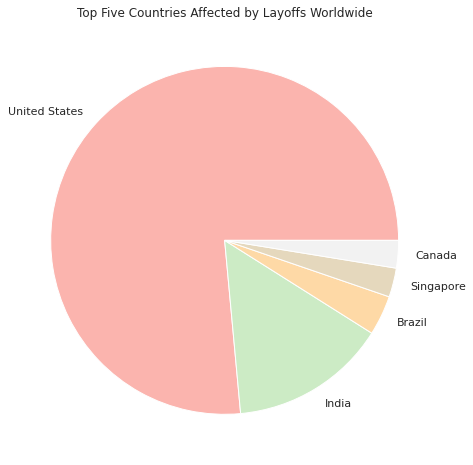

In [ ]:
# Pie chart showing top five countries affected by lay off
layoffs.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(
    ylabel="", 
    figsize=(8,8), 
    kind='pie', 
    stacked=True, 
    colormap='Pastel1',
    title='Top Five Countries Affected by Layoffs Worldwide')

The above chart shows that U.S has the highest number of tech layoffs globally, followed by india.

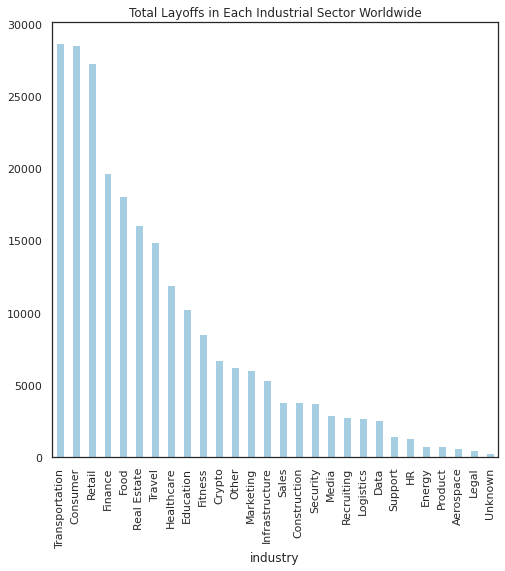

In [ ]:
# Bar chart showing industries affected by lay off
layoffs.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).plot(
    ylabel="",
    figsize=(8,8), 
    kind='bar',
    stacked=True, 
    colormap='Paired',
    title='Total Layoffs in Each Industrial Sector Worldwide')

The above chart shows that tech employees in the Transportation, Consumer, Retail, and Finance industries were laid off the most while sectors like Legal, Aerospace, Product, and Energy experienced less layoffs. It also shows that relative to most industies, tech workers in the Data industry also experienced less layoffs.

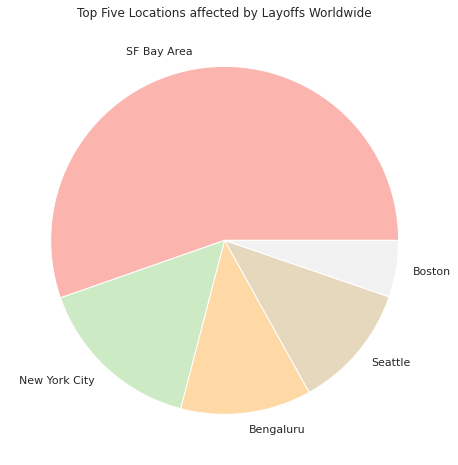

In [ ]:
# Pie chart showing top 5 locations with most layoffs
layoffs.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head().plot(
    ylabel="",
    figsize=(8,8), 
    kind='pie', 
    stacked=True, 
    colormap='Pastel1',
    title='Top Five Locations affected by Layoffs Worldwide')

As can be inferred from U.S tech news, tech companies in the San Francisco Bay Area have laid off the most compared to other locations.

In [ ]:
# Table showing Top 10 Companies with most layoffs

# Set date as index
layoffs = layoffs.set_index('date')

# Descending sort of values of total worker laid off
most_layoffs = layoffs.sort_values(by='total_laid_off', ascending=False)
most_layoffs.head(10)

,company,location,industry,total_laid_off,country
date,,,,,
2022-11-09,Meta,SF Bay Area,Consumer,11000,United States
2022-11-16,Amazon,Seattle,Retail,10000,United States
2020-07-30,Booking.com,Amsterdam,Travel,4375,Netherlands
2022-11-16,Cisco,SF Bay Area,Infrastructure,4100,United States
2022-11-04,Twitter,SF Bay Area,Consumer,3700,United States
2020-05-06,Uber,SF Bay Area,Transportation,3700,United States
2020-05-18,Uber,SF Bay Area,Transportation,3000,United States
2022-03-08,Better.com,New York City,Real Estate,3000,United States
2022-02-08,Peloton,New York City,Fitness,2800,United States


The above table shows the top ten (10) companies that laid off the most staff. It includes Big Tech companies like Meta, Amazon, Cisco, Twitter, and Uber.

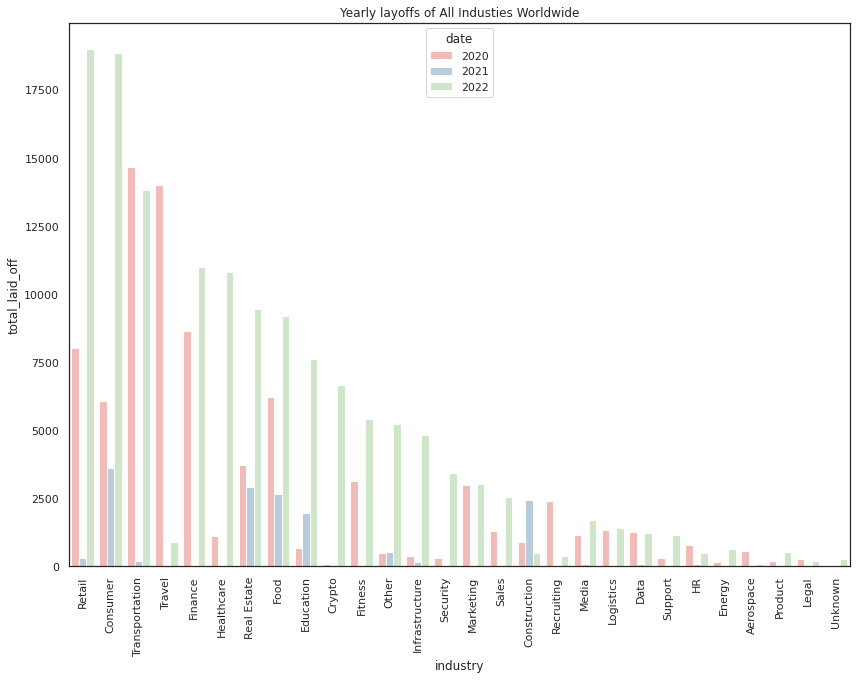

In [ ]:
# Yearly layoffs of all industries
layoffs = layoffs.reset_index()
layoffs['date'] = pd.to_datetime(layoffs['date'])
df_industry = layoffs.groupby([ layoffs.industry, layoffs.date.dt.year]).sum()

df_industry = df_industry.reset_index()

plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.title("Yearly layoffs of All Industies Worldwide")
sns.set(style="white", palette="Pastel1", color_codes=True)

sns.barplot(data=df_industry.sort_values(by=['total_laid_off','date'], ascending=False), 
    x="industry",
    y="total_laid_off",
    hue="date")

The above chart shows relatively high layoffs in 2020, followed in 2021 by a significant drop in layoffs, and a disproportionate increase in 2021. Of all years explored, 2021 shows the highest total number of layoffs.

Most insdustries experienced most layoffs in 2021, except Transportation and Travel industries that experienced their highest layoff numbers in 2020. This is expected because the year 2020 was the peak of the COVID-19 pandemic when most of the world were on lockdown.

([<matplotlib.patches.Wedge at 0x7f7e0233ddc0>,
 [Text(0.853662465374705, 0.6937293385826931, 'Transportation'),
  Text(-0.48496501459523633, 0.9873241284495393, 'Finance'),
  Text(-1.077416941646905, -0.22174925896658587, 'Travel'),
  Text(-0.14038079529237635, -1.091005605995258, 'Education'),
  Text(0.9338569104643634, -0.5813013596904401, 'Food')],
 [Text(0.46563407202256635, 0.3783978210451053, '13%'),
  Text(-0.2645263715974016, 0.5385404336997487, '12%'),
  Text(-0.587681968171039, -0.12095414125450137, '12%'),
  Text(-0.07657134288675073, -0.5950939669065043, '11%'),
  Text(0.5093764966169254, -0.3170734689220582, '10%')])

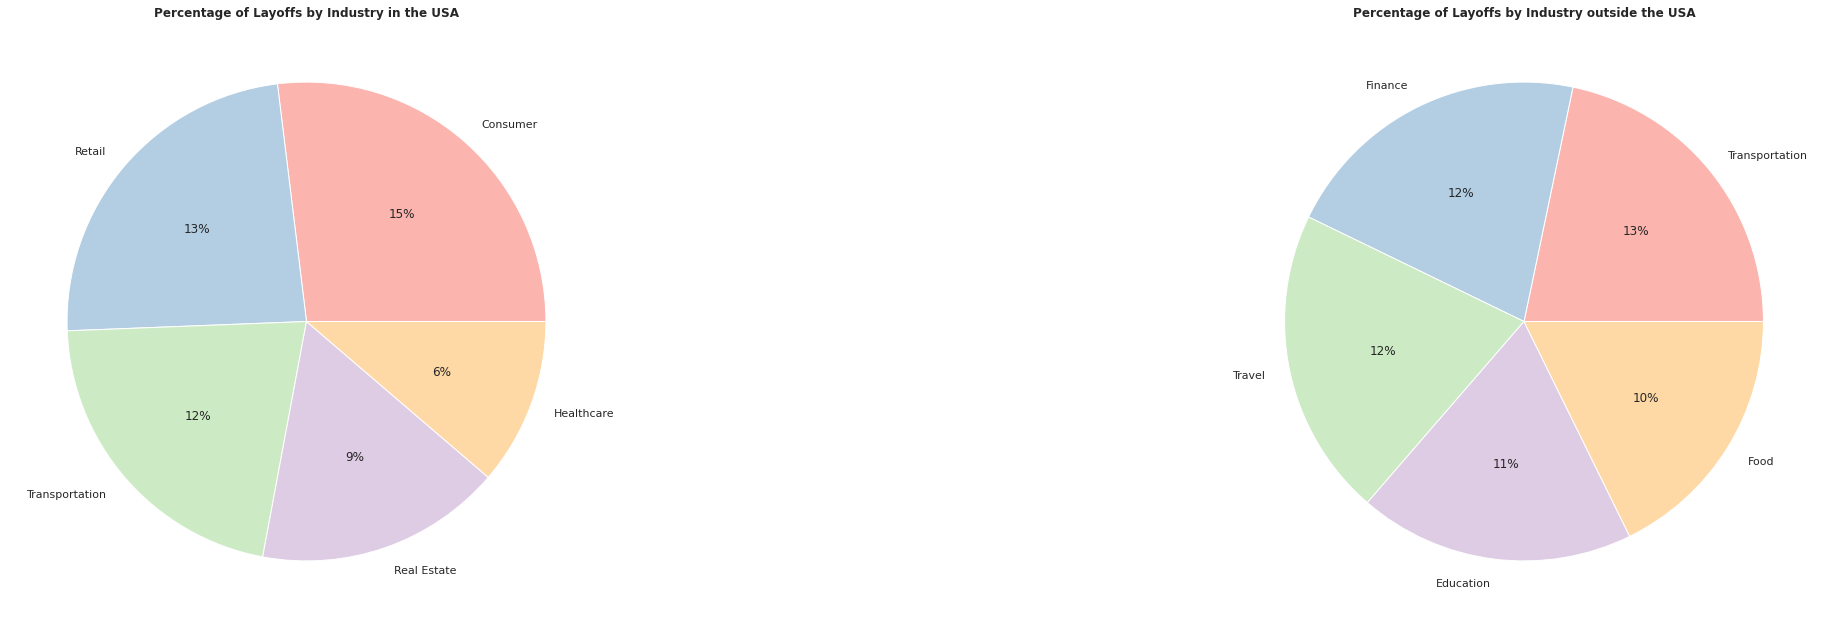

In [ ]:
# Percentage of layoffs by industry in USA and Non-USA locations
# Separate USA from non-USA data
layoffs_usa = layoffs[layoffs['country']=="United States"]
layoffs_not_usa = layoffs[layoffs['country']!="United States"]

# Get top five to be plotted
df1 = layoffs_usa.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()
df2 = layoffs_not_usa.groupby("industry")['total_laid_off'].sum().sort_values(ascending=False).head()

# Generate subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# Create titles for the pie charts
ax1.set_title("Percentage of Layoffs by Industry in the USA", fontweight='bold')
ax2.set_title("Percentage of Layoffs by Industry outside the USA", fontweight='bold')

# Plot pie chart for both USA and non_USA locations
ax1.pie(x=df1,labels=df1.index, autopct=lambda x: '{:.0f}{}'.format( (x*df1.values.sum()/100) / layoffs_usa['total_laid_off'].sum()*100, '%' ))
ax2.pie(x=df2,labels=df2.index, autopct=lambda x: '{:.0f}{}'.format( (x*df2.values.sum()/100) / layoffs_not_usa['total_laid_off'].sum()*100, '%' ))

The above chart shows the top five (5) percentages of layoffs in the US and outside the USA. As can be observed, the Consumer, Retail, and Transportation industries experienced the most layoffs in the USA, while Transportation, Finance, and Travel experienced the highest layoffs outside the USA. This sheds light on the employment predicament of tech workers in the Transportation industry worldwide.

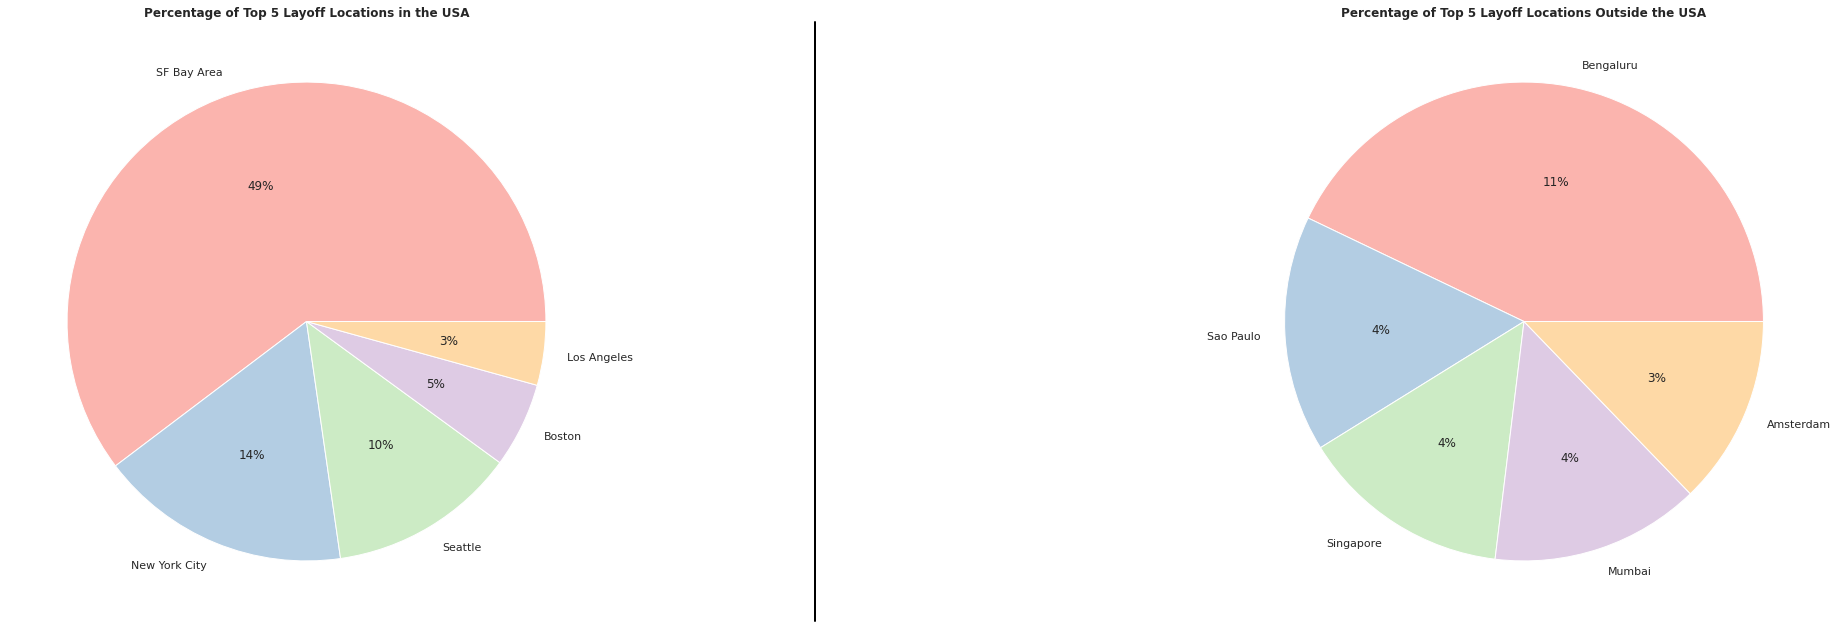

In [ ]:
# Percentage of layoffs by location in USA and Non-USA
# Get top five to be plotted
df3 = layoffs_usa.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()
df4 = layoffs_not_usa.groupby("location")['total_laid_off'].sum().sort_values(ascending=False).head()

# Generate subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(rect=(0,0,1.7,0.9))

# Create titles for the pie charts
ax1.set_title("Percentage of Top 5 Layoff Locations in the USA", fontweight='bold')
ax2.set_title("Percentage of Top 5 Layoff Locations Outside the USA", fontweight='bold')

# Plot pie chart for both USA and non_USA locations
ax1.pie(x=df3,labels=df3.index, autopct=lambda x: '{:.0f}{}'.format( (x*df3.values.sum()/100) / layoffs_usa['total_laid_off'].sum()*100, '%' ))
ax2.pie(x=df4,labels=df4.index, autopct=lambda x: '{:.0f}{}'.format( (x*df4.values.sum()/100) / layoffs_usa['total_laid_off'].sum()*100, '%' ))

# Seperate charts with a divider
ax1.plot([1.35, 1.35], [0, 1], color='black', lw=2, transform=ax1.transAxes, clip_on=False)

The above charts show that forty-nine percent (49%) of all tech layoffs in the USA were largely in the San Franscisco Bay Area, followed by New York City, and Seattle. Outside the USA, Bengaluru, India recorded the highest number of layoffs, followed by Sau Paul, Brazil, Singapore, and Mumbai, India.

### **DATA PREPROCESSING**

In [ ]:
# Set the index
layoffs.set_index('date', inplace=True)
layoffs

,company,location,industry,total_laid_off,country
date,,,,,
2022-11-29,Lyst,London,Retail,50,United Kingdom
2022-11-29,Bitfront,SF Bay Area,Crypto,1,United States
2022-11-29,Lazerpay,Lagos,Crypto,1,Nigeria
2022-11-29,MessageBird,Amsterdam,Other,1,Netherlands
2022-11-29,Plerk,Guadalajara,Finance,1,Mexico
...,...,...,...,...,...
2020-03-16,Service,Los Angeles,Travel,1,United States
2020-03-13,HopSkipDrive,Los Angeles,Transportation,8,United States
2020-03-13,Panda Squad,SF Bay Area,Consumer,6,United States


In [ ]:
for col in layoffs:
  print(len(layoffs[col].unique()))

1420
161
28
230
55


The above results show a large number of unique values in the categorical columns. The high number of categorical values mean using one-hot/dummy encoding will increase the dimensionality to thousands. To minimize the curse of dimensionality, binary encoding is used. **Binary Encoding** is a technique used to transform categorical data into numerical data by encoding categories as integers and then converting them into binary code.

In [ ]:
# Drop excess columns
#layoffs.drop(layoffs.columns[4], axis=1, inplace=True)
#layoffs.drop(layoffs.columns[3], axis=1, inplace=True)
#layoffs.drop(layoffs.columns[0], axis=1, inplace=True)
#layoffs.drop(layoffs.columns[0], axis=1, inplace=True)
layoffs

,company,location,industry,total_laid_off,country
date,,,,,
2022-11-29,Lyst,London,Retail,50,United Kingdom
2022-11-29,Bitfront,SF Bay Area,Crypto,1,United States
2022-11-29,Lazerpay,Lagos,Crypto,1,Nigeria
2022-11-29,MessageBird,Amsterdam,Other,1,Netherlands
2022-11-29,Plerk,Guadalajara,Finance,1,Mexico
...,...,...,...,...,...
2020-03-16,Service,Los Angeles,Travel,1,United States
2020-03-13,HopSkipDrive,Los Angeles,Transportation,8,United States
2020-03-13,Panda Squad,SF Bay Area,Consumer,6,United States


In [ ]:
# Run binary encoder on each categorical column
layoffs = BinaryEncoder(cols=['company']).fit(layoffs).transform(layoffs)
layoffs = BinaryEncoder(cols=['location']).fit(layoffs).transform(layoffs)
layoffs = BinaryEncoder(cols=['industry']).fit(layoffs).transform(layoffs)
layoffs = BinaryEncoder(cols=['country']).fit(layoffs).transform(layoffs)
layoffs

,company_0,company_1,company_2,company_3,company_4,company_5,company_6,company_7,company_8,company_9,...,industry_2,industry_3,industry_4,total_laid_off,country_0,country_1,country_2,country_3,country_4,country_5
date,,,,,,,,,,,,,,,,,,,,,
2022-11-29,0,0,0,0,0,0,0,0,0,0,...,0,0,1,50,0,0,0,0,0,1
2022-11-29,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
2022-11-29,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,1,1
2022-11-29,0,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,0,0,1,0,0
2022-11-29,0,0,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-16,1,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2020-03-13,0,1,1,1,0,1,1,1,0,1,...,0,1,0,8,0,0,0,0,1,0
2020-03-13,1,0,1,1,0,0,0,1,0,1,...,1,0,1,6,0,0,0,0,1,0


The above table shows the file has twenty-five additional columns after binary encoding. 

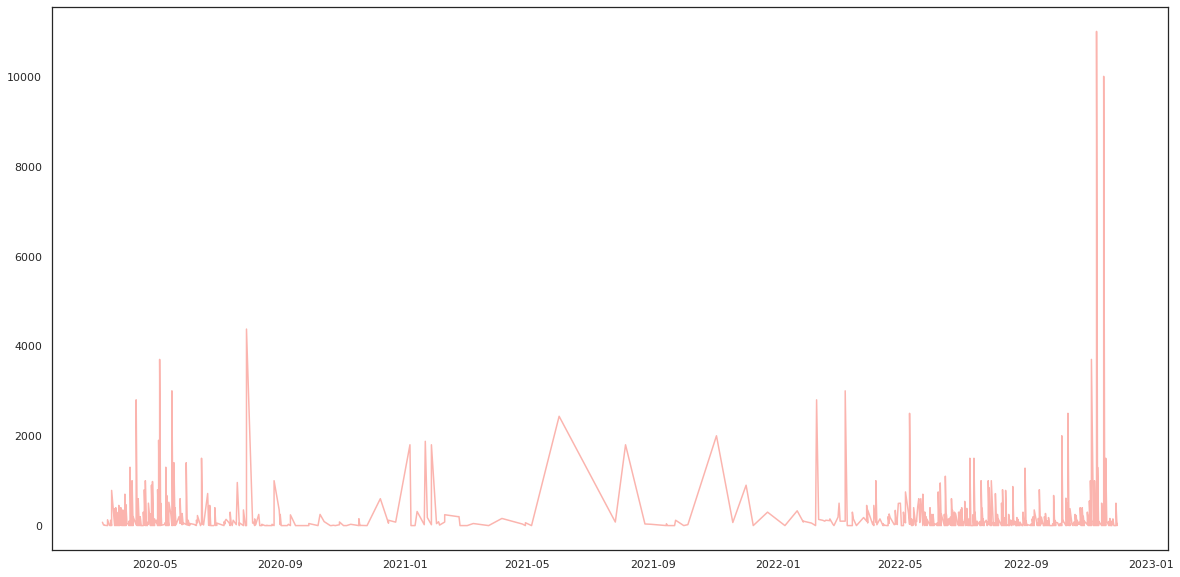

In [ ]:
plt.plot(layoffs['total_laid_off'])

## **MODELS**

For time series forecasting, this report will compare the performance of three machine learning models on the data set. They are RNN, LSTM, and GRU.

In [ ]:
# Normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(layoffs)
layoffs_scaled = scaler.transform(layoffs)
layoffs_scaled

array([[-0.55940657, -0.726914  , -0.92988519, ..., -0.38114337,
        -1.89894135,  2.21493191],
       [-0.55940657, -0.726914  , -0.92988519, ..., -0.38114337,
         0.52660921, -0.45148115],
       [-0.55940657, -0.726914  , -0.92988519, ..., -0.38114337,
         0.52660921,  2.21493191],
       ...,
       [ 1.78760861, -0.726914  ,  1.07540158, ..., -0.38114337,
         0.52660921, -0.45148115],
       [ 1.78760861, -0.726914  ,  1.07540158, ..., -0.38114337,
         0.52660921, -0.45148115],
       [ 1.78760861, -0.726914  , -0.92988519, ..., -0.38114337,
         0.52660921, -0.45148115]])

In [ ]:
# Need the data to be in the form [sample, time steps, features (dimension of each element)]
samples = 10 # Number of samples (in past)
steps = 1 # Number of steps (in future)
X = [] # X array
Y = [] # Y array
for i in range(layoffs_scaled.shape[0] - samples):
    X.append(layoffs_scaled[i:i+samples, 0:5]) # Independent Samples
    Y.append(layoffs_scaled[i+samples, 5:]) # Dependent Samples
print('Training Data: Length is ',len(X[0:1][0]),': ', X[0:1])
print('Testing Data: Length is ', len(Y[0:1]),': ', Y[0:1])

#Reshape the data so that the inputs will be acceptable to the model.
X = np.array(X)
Y = np.array(Y)
print('Dimensions of X', X.shape, 'Dimensions of Y', Y.shape)

# # Get the training and testing set
threshold = round(0.9 * X.shape[0])
trainX, trainY = X[:threshold], Y[:threshold]
testX, testY =  X[threshold:], Y[threshold:]
print('Training Length',trainX.shape, trainY.shape,'Testing Length:',testX.shape, testY.shape)

Training Data: Length is  10 :  [array([[-0.55940657, -0.726914  , -0.92988519, -0.94880146, -1.00413836],
       [-0.55940657, -0.726914  , -0.92988519, -0.94880146, -1.00413836],
       [-0.55940657, -0.726914  , -0.92988519, -0.94880146, -1.00413836],
       [-0.55940657, -0.726914  , -0.92988519, -0.94880146, -1.00413836],
       [-0.55940657, -0.726914  , -0.92988519, -0.94880146, -1.00413836],
       [-0.55940657, -0.726914  , -0.92988519, -0.94880146, -1.00413836],
       [-0.55940657, -0.726914  , -0.92988519, -0.94880146, -1.00413836],
       [-0.55940657, -0.726914  , -0.92988519, -0.94880146, -1.00413836],
       [-0.55940657, -0.726914  , -0.92988519, -0.94880146, -1.00413836],
       [-0.55940657, -0.726914  , -0.92988519, -0.94880146, -1.00413836]])]
Testing Data: Length is  1 :  [array([-0.98652151, -0.98071686,  0.9958787 , -0.99470429,  0.98768643,
        1.01127298, -0.15546441, -0.34146858, -0.51379189, -0.60484213,
        1.40673749, -0.5912041 ,  0.76136925,  1.3

### **RECURRENT NEURAL NETWORK (RNN)**

RNN is a ML model designed to work with sequential data in any form ranging from text to video. It uses the previous informatin in the sequence to produce the current output. Its major caveat is it faces short-term memory problem which is caused due to vanishing gradient problem. As RNN processes more steps it suffers from vanishing gradient more than other neural network architectures. Vanishing gradient occurs as a result of backpropagation through time at each step the gradient is calculated. The gradient is used to update weights in the network. If the effect of the previous layer on the current layer is small then the gradient value will be small and vice-versa. If the gradient of the previous layer is smaller then the gradient of the current layer will be even smaller. This makes the gradients exponentially shrink down as we backpropagate. Smaller gradient means it will not affect the weight updation. Due to this, the network does not learn the effect of earlier inputs. Hence, causing the short-term memory problem.

In [ ]:
# Initialize the model
rnn_model = RNN_Example()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 30)                1080      
                                                                 
 dropout_16 (Dropout)        (None, 30)                0         
                                                                 
 dense_16 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,111
Trainable params: 1,111
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the models
rnn_trained = rnn_model.fit(trainX,
                            trainY,
                            shuffle = False, # Since this is time series data
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1) # Verbose outputs data

Epoch 1/100
38/38 [==============================] - 1s 10ms/step - loss: 1.6952 - val_loss: 1.1701
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 1.2662 - val_loss: 1.1186
Epoch 3/100
38/38 [==============================] - 0s 4ms/step - loss: 1.2236 - val_loss: 1.0955
Epoch 4/100
38/38 [==============================] - 0s 4ms/step - loss: 1.1776 - val_loss: 1.0781
Epoch 5/100
38/38 [==============================] - 0s 4ms/step - loss: 1.1558 - val_loss: 1.0648
Epoch 6/100
38/38 [==============================] - 0s 4ms/step - loss: 1.1424 - val_loss: 1.0589
Epoch 7/100
38/38 [==============================] - 0s 5ms/step - loss: 1.1340 - val_loss: 1.0495
Epoch 8/100
38/38 [==============================] - 0s 5ms/step - loss: 1.1160 - val_loss: 1.0422
Epoch 9/100
38/38 [==============================] - 0s 4ms/step - loss: 1.0971 - val_loss: 1.0377
Epoch 10/100
38/38 [==============================] - 0s 4ms/step - loss: 1.1041 - val_loss: 1.0354
Epoch 11

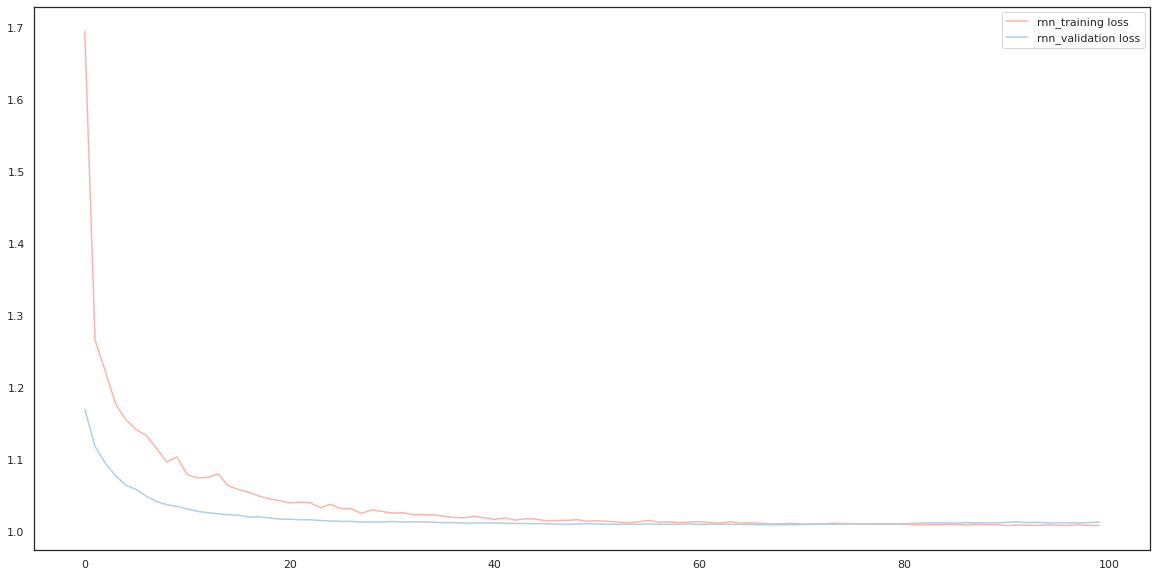

In [ ]:
# Plotting the loss iteration
plt.plot(rnn_trained.history['loss'], label = 'rnn_training loss')
plt.plot(rnn_trained.history['val_loss'], label ='rnn_validation loss')
plt.legend()

### **GATED RECURRENT UNIT (GRU)**

GRU is a specialized version of RNN, but the difference is in the operations inside the GRU unit. GRU has two gates (neural networks) each with its own set of weights and biases, the reset gate, and the update gate. The update gate decides if the cell state should be updated with the current activation value or not, while the reset gate is used to decide whether the previous cell state is important or not.

In [ ]:
# Initialize the model
gru_model = GRU_Example()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 30)                3330      
                                                                 
 dropout_19 (Dropout)        (None, 30)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 31        
                                                                 
Total params: 3,361
Trainable params: 3,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
gru_trained = gru_model.fit(trainX,
                            trainY,
                            shuffle = False, # Since this is time series data
                            epochs=100,
                            batch_size=32,
                            validation_split=0.2,
                            verbose=1) # Verbose outputs data

Epoch 1/100
38/38 [==============================] - 3s 20ms/step - loss: 1.0674 - val_loss: 1.0128
Epoch 2/100
38/38 [==============================] - 0s 8ms/step - loss: 1.0482 - val_loss: 1.0108
Epoch 3/100
38/38 [==============================] - 0s 7ms/step - loss: 1.0423 - val_loss: 1.0088
Epoch 4/100
38/38 [==============================] - 0s 7ms/step - loss: 1.0396 - val_loss: 1.0084
Epoch 5/100
38/38 [==============================] - 0s 9ms/step - loss: 1.0349 - val_loss: 1.0078
Epoch 6/100
38/38 [==============================] - 0s 8ms/step - loss: 1.0336 - val_loss: 1.0074
Epoch 7/100
38/38 [==============================] - 0s 8ms/step - loss: 1.0300 - val_loss: 1.0086
Epoch 8/100
38/38 [==============================] - 0s 8ms/step - loss: 1.0248 - val_loss: 1.0094
Epoch 9/100
38/38 [==============================] - 0s 8ms/step - loss: 1.0235 - val_loss: 1.0130
Epoch 10/100
38/38 [==============================] - 0s 7ms/step - loss: 1.0234 - val_loss: 1.0096
Epoch 11

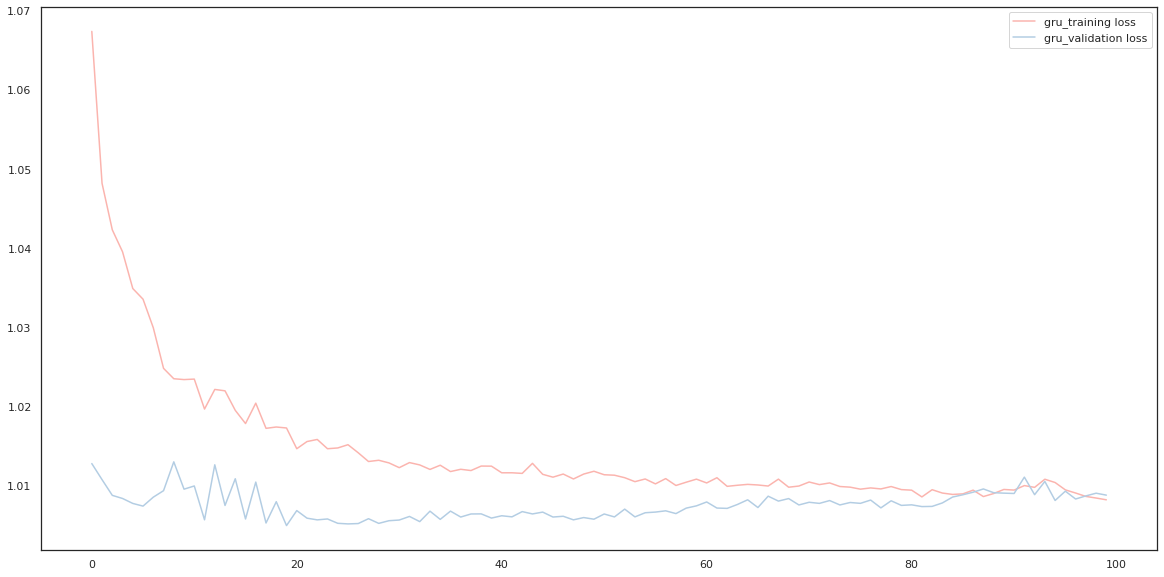

In [ ]:
plt.plot(gru_trained.history['loss'], label = 'gru_training loss')
plt.plot(gru_trained.history['val_loss'], label ='gru_validation loss')
plt.legend()

### **LONG SHORT-TERM MEMORY (LSTM)**

LSTM is a variety of recurrent neural networks (RNN) that is capable of learning long-term dependencies, especially in sequence predicting problems. It is well used in speech recognition, machine translation, and stock market predction. Additional to GRU, LSTM also has forget gate and output gate. Forget gate controls what is kept vs forgotten from previous cell state, while the output gate controls which parts of the cell are output to the hidden state, thereby determining what the next hidden state will be.

In [ ]:
# Initialize the model
lstm_model = LSTM_Example()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 30)                4320      
                                                                 
 dropout_20 (Dropout)        (None, 30)                0         
                                                                 
 dense_20 (Dense)            (None, 1)                 31        
                                                                 
Total params: 4,351
Trainable params: 4,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_trained = lstm_model.fit(trainX,
                              trainY,
                              shuffle = False, # Since this is time series data
                              epochs=20,
                              batch_size=32,
                              validation_split=0.2,
                              verbose=1) # Verbose outputs data

Epoch 1/20
38/38 [==============================] - 3s 21ms/step - loss: 1.0492 - val_loss: 1.0985
Epoch 2/20
38/38 [==============================] - 0s 9ms/step - loss: 1.0349 - val_loss: 1.0358
Epoch 3/20
38/38 [==============================] - 0s 7ms/step - loss: 1.0281 - val_loss: 1.0391
Epoch 4/20
38/38 [==============================] - 0s 8ms/step - loss: 1.0216 - val_loss: 1.0196
Epoch 5/20
38/38 [==============================] - 0s 7ms/step - loss: 1.0222 - val_loss: 1.0160
Epoch 6/20
38/38 [==============================] - 0s 7ms/step - loss: 1.0194 - val_loss: 1.0116
Epoch 7/20
38/38 [==============================] - 0s 7ms/step - loss: 1.0164 - val_loss: 1.0082
Epoch 8/20
38/38 [==============================] - 0s 7ms/step - loss: 1.0163 - val_loss: 1.0055
Epoch 9/20
38/38 [==============================] - 0s 7ms/step - loss: 1.0163 - val_loss: 1.0043
Epoch 10/20
38/38 [==============================] - 0s 8ms/step - loss: 1.0160 - val_loss: 1.0041
Epoch 11/20
38/38 

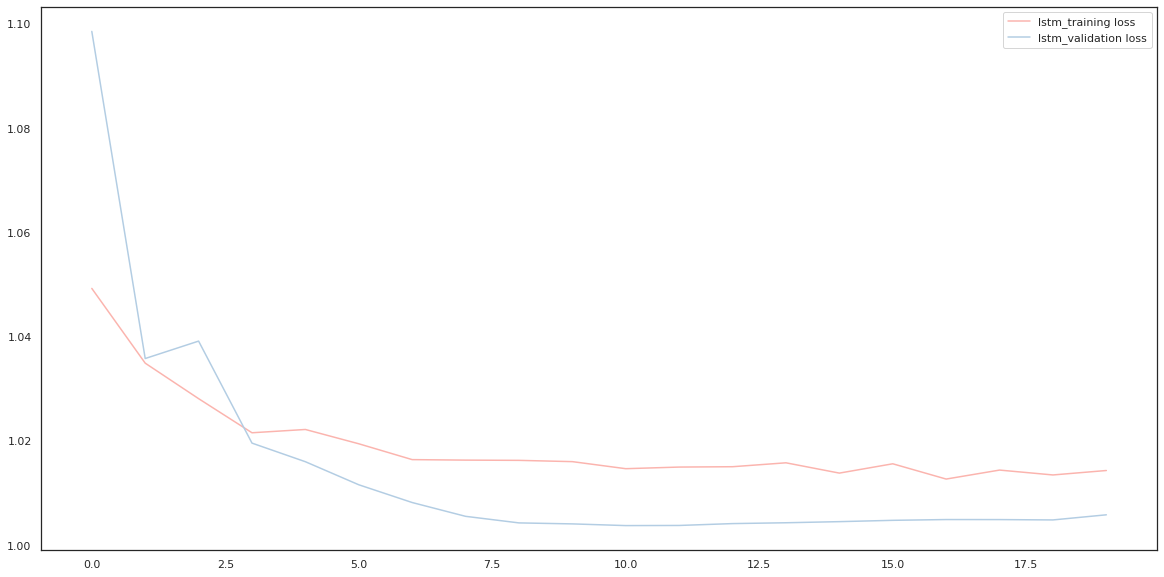

In [ ]:
plt.plot(lstm_trained.history['loss'], label = 'lstm_training loss')
plt.plot(lstm_trained.history['val_loss'], label ='lstm_validation loss')
plt.legend()

## **CONCLUSION**

In [ ]:
# Performance measures after 20 epochs
performance_measure = pd.DataFrame()
performance_measure.insert(0, 'Models (After 20 Epochs)', ['RNN', 'GRU', 'LSTM'])

performance_measure.insert(1, 'Train Loss', ['1.0434', '1.0173', '1.0143'])
performance_measure.insert(2, 'Validation Loss', ['1.0178', '1.0050', '1.0037'])

performance_measure

,Models (After 20 Epochs),Train Loss,Validation Loss
0,RNN,1.0434,1.0178
1,GRU,1.0173,1.0050
2,LSTM,1.0143,1.0037


There exploration segment of this report showed alot of interesting information such as:

- U.S has the highest number of tech layoffs globally, followed by india.

- Tech employees in the Transportation, Consumer, Retail, and Finance industries were laid off the most while sectors like Legal, Aerospace, Product, and Energy experienced less layoffs. 

- Tech workers in the Data industry experienced fewer layoffs than most.

- Tech companies in the San Francisco Bay Area have laid off the most employees compared to other locations around the world

- Meta and Amazon have laid off the most tech employees globally

- Very few tech employees were laid off in 2021

- Transportation and Travel industries were hit hard at the start of the COVID pandemic, causing the highest layoffs of tech employees in 2020

- In The USA, tech employees in the consumer industry are the most vulnerable to layoffs

- San Francisco Bay Area tech employees are at high risk of being laid off

All three models performed well on the data set, but it can be observed that in 20 epochs, LSTM yielded a more stable result than RNN and GRU did in 100 epochs. Also, LSTM shows less loss than RNN and GRU. 